In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yersever/500-person-gender-height-weight-bodymassindex")

print("Path to dataset files:", path)

100%|██████████| 2.26k/2.26k [00:00<00:00, 1.90MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yersever/500-person-gender-height-weight-bodymassindex/versions/2


In [2]:
# importing Pandas
import pandas as pd
# importing NumPy
import numpy as np


In [5]:
# read data
data = pd.read_csv("/content/archive.zip")

#data.head()
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
# We need to calculate BMI which can be done using Height and Weight features
data['Height_meters'] = data['Height']/100
data['calculated_BMI'] = data['Weight']/(data['Height_meters']*data['Height_meters'])


# print head of data
data.head()

,Gender,Height,Weight,Index,Height_meters,calculated_BMI
0,Male,174,96,4,1.74,31.708284
1,Male,189,87,2,1.89,24.355421
2,Female,185,110,4,1.85,32.140248
3,Female,195,104,3,1.95,27.350427
4,Male,149,61,3,1.49,27.476240


In [7]:
data['deviation_from_max_height'] = data['Height'] - data['Height'].max()

data['deviation_from_min_weight'] = data['Weight'] - data['Weight'].min()

data['deviation_from_avg_BMI'] = data['calculated_BMI'] - data['calculated_BMI'].mean()



#See how it affected our data, print head of data
data.head()


,Gender,Height,Weight,Index,Height_meters,calculated_BMI,deviation_from_max_height,deviation_from_min_weight,deviation_from_avg_BMI
0,Male,174,96,4,1.74,31.708284,-25,46,-6.057000
1,Male,189,87,2,1.89,24.355421,-10,37,-13.409863
2,Female,185,110,4,1.85,32.140248,-14,60,-5.625036
3,Female,195,104,3,1.95,27.350427,-4,54,-10.414857
4,Male,149,61,3,1.49,27.476240,-50,11,-10.289044


In [8]:
# read train csv data
data = pd.read_csv("/content/Titanic.csv")

# print head
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# drop cols which have more than 70% null values using thresh parameter
d1= data.dropna(thresh=0.7*len(data), axis=1)
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
len(d1.columns)

11

In [11]:
threshold = 0.7
#filter columns with mean missing value higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]


#filter rows with mean missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]


# print data
data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
# check null counts in each column
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
# Filling missing values with medians of Age column
data['Age'] = data.Age.fillna(data.Age.median())

# print head of data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Check again total number of nan in each feature
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# lets impute nan in column Embarked with maximum occured values in it.
data['Embarked'].value_counts()


,count
Embarked,
S,646
C,168
Q,77


In [19]:
data['Embarked']=data['Embarked'].fillna('S')

#check total count of nan again in each feature
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
#We will need same data for other techniques as well so better we leave originial undisturbed by copying it into new_data
new_data = pd.read_csv("/content/Titanic.csv")
new_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
new_data.shape

(891, 12)

In [27]:
# Lets define our factor=3 as our factor to calculate our limit
factor = 3

# Calculate upper limit and lower limit  of 'Fare' column to decide the threshold to detect outlier
#Hint use: upper_lim=mean+std*factor
#          loeer_lim=mean-std*factor

upper_lim = new_data['Fare'].mean() + new_data['Fare'].std() * factor
lower_lim = new_data['Fare'].mean() - new_data['Fare'].std() * factor



In [28]:
#Now filter our 'Fare' with data lower than upper_lim and greater than lower_lim
new_data = new_data[(new_data['Fare'] < upper_lim) & (new_data['Fare'] > lower_lim)]

#print the length of original and new data
print(len(new_data))
print(len(data))


871
891


In [29]:
#copy data again into new_data
new_data = pd.read_csv("/content/Titanic.csv")

#create upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_lim = new_data['Fare'].quantile(.95)
lower_lim = new_data['Fare'].quantile(.05)

#Dropping the outlier rows in 'Fare' with your created limited.
new_data = new_data[(new_data['Fare'] < upper_lim) & (new_data['Fare'] > lower_lim)]

#print the length of both original and new data after filter
print(len(new_data))
print(len(data))

791
891


In [32]:
#copy data into new_data
new_data = pd.read_csv("/content/Titanic.csv")

#create upper and lower limits for column 'Fare' based on 95% and 5% respectively.
upper_lim = new_data['Fare'].quantile(.95)
lower_lim = new_data['Fare'].quantile(.05)

#Capping the outlier rows with Percentiles
new_data.loc[(new_data['Fare'] > upper_lim),'Fare'] = upper_lim
new_data.loc[(new_data['Fare'] < lower_lim),'Fare'] = lower_lim


# print length of original and new data after capping.
print(len(new_data))
print(len(data))



891
891


In [37]:
# copy the data into new_data
new_data1 = pd.read_csv("/content/Titanic.csv")

# Normalizing the Age column using the given formula #Normalization=(x-xmin)/(xmax-xmin)
new_data1['Age'] = (new_data1['Age'] - new_data1['Age'].min()) / (new_data1['Age'].max() - new_data1['Age'].min())

# Normalizing the Fare column using the given formula (x-xmin)/(xmax-xmin)
new_data1['Fare'] = (new_data1['Fare'] - new_data1['Fare'].min()) / (new_data1['Fare'].max() - new_data1['Fare'].min())

# print head
new_data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S


In [38]:
#STANDARIZATION=> Z=(X - Xmean) / sigma

# copy the data into new_data
new_data = pd.read_csv("/content/Titanic.csv")

#Standardizing the Age column using the Z formula given above
new_data['Age'] = new_data['Age'].apply(lambda x: (x - new_data['Age'].mean()) / new_data['Age'].std())

#Standardizing the Fare column  using the Z formula given above
new_data['Fare'] = new_data['Age'].apply(lambda x: (x - new_data['Age'].mean()) / new_data['Age'].std())

# print head of new_data
new_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530005,1,0,A/5 21171,-0.530005,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571430,1,0,PC 17599,0.571430,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254646,0,0,STON/O2. 3101282,-0.254646,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.364911,1,0,113803,0.364911,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.364911,0,0,373450,0.364911,NaN,S


In [39]:
# copy the data into new_data
new_data = pd.read_csv("/content/Titanic.csv")
new_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Impliment binning on Age and make another column names Age_group with  bins=[0,18,40,100] and label them as "Children", "Adult" and"Old"
new_data['Age_group'] =  pd.cut(new_data['Age'], bins=[0,18,40,100], labels=["Children", "Adult", "Old"])


In [43]:
#count total values of each category
new_data['Age_group'].value_counts()

,count
Age_group,
Adult,425
Old,150
Children,139


In [44]:
import seaborn as sns

<Axes: xlabel='Age_group', ylabel='Count'>

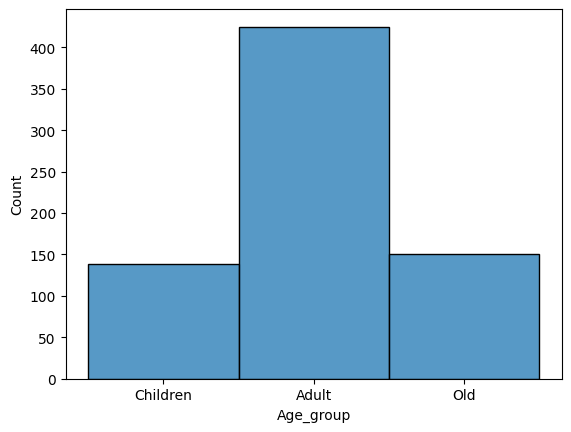

In [47]:
#Checking 'Age_group' distribution
sns.histplot(x='Age_group', data=new_data)




In [50]:
# Count unique value counts for both the columns.
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [49]:
# Import Label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder
labelencoder = LabelEncoder()


# Assigning numerical values in column Sex and storing in another column named Sex_encode
data['Sex_encode'] = labelencoder.fit_transform(data['Sex'])


#print data.head()
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [56]:
#Using get_dummies function encode and concat encoded features in data
data=pd.read_csv("/content/Titanic.csv")
new_data2=pd.concat([data, pd.get_dummies(data['Embarked'])], axis=1)




In [57]:
boolean_value = True
integer_value = int(boolean_value)
# integer_value is now 1

boolean_value_false = False
integer_value_false = int(boolean_value_false)
# integer_value_false is now 0

In [58]:
new_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True,False,False


In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivachandel/kc-house-data")

print("Path to dataset files:", path)

100%|██████████| 770k/770k [00:00<00:00, 80.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivachandel/kc-house-data/versions/1


In [59]:
new_data=pd.read_csv("/content/archive (1).zip")

In [60]:
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: xlabel='price', ylabel='Count'>

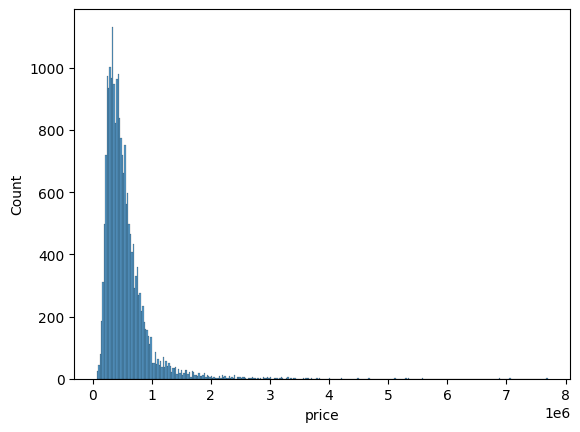

In [61]:
sns.histplot(x='price', data=new_data)

In [62]:
#square root tranform and its distribution
new_data['price_sqrt'] = np.sqrt(new_data['price'])

<Axes: xlabel='price_sqrt', ylabel='Count'>

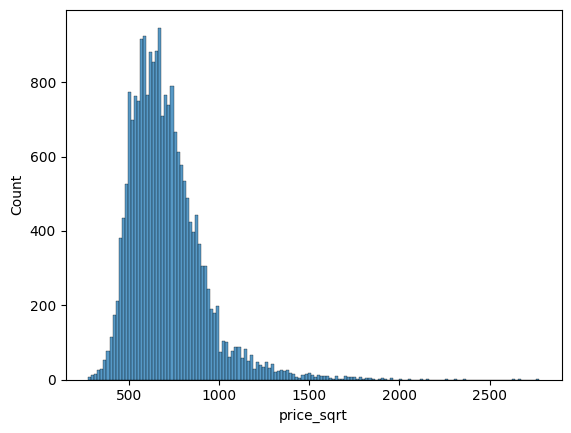

In [63]:
sns.histplot(x='price_sqrt', data=new_data)

In [64]:
#reciprocal transformation and its plot
new_data['price_reciprocal'] = 1 / new_data['price']


<Axes: xlabel='price_reciprocal', ylabel='Count'>

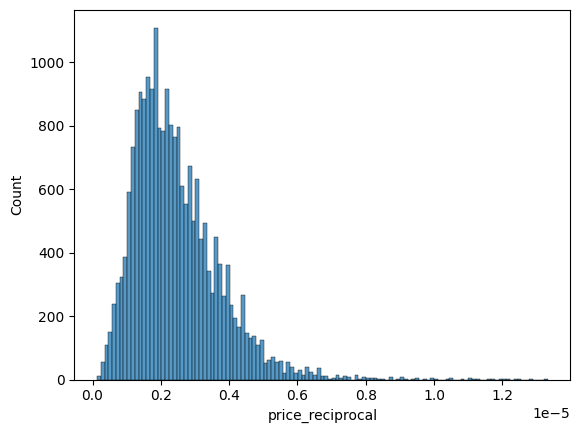

In [65]:
sns.histplot(x='price_reciprocal', data=new_data)

In [66]:
#hint: the below output is when we took exponenent value as 1/8. You can try and check your own value also.
new_data['price_exponential'] = new_data['price'] ** (1/8)

<Axes: xlabel='price_exponential', ylabel='Count'>

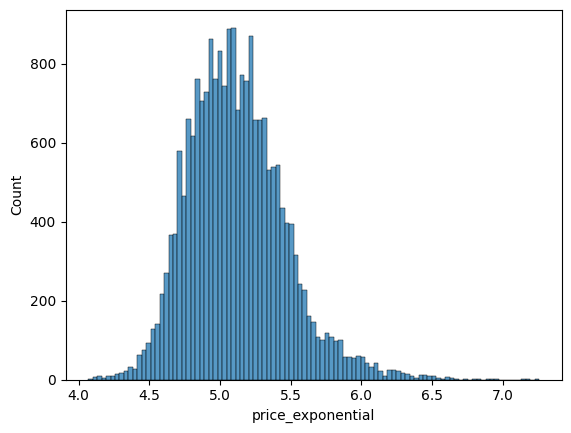

In [67]:
sns.histplot(x='price_exponential', data=new_data)

In [95]:
# importing datetime
import datetime

In [68]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("martj42/international-football-results-from-1872-to-2017")

print("Path to dataset files:", path)

100%|██████████| 1.16M/1.16M [00:00<00:00, 89.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/martj42/international-football-results-from-1872-to-2017/versions/102


In [86]:
data = pd.read_csv(f"{path}/results.csv")

In [87]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
48886,2025-12-12,Jordan,Iraq,1,0,Arab Cup,Al Rayyan,Qatar,True
48887,2025-12-12,Algeria,United Arab Emirates,1,1,Arab Cup,Al Khor,Qatar,True
48888,2025-12-15,Morocco,United Arab Emirates,3,0,Arab Cup,Al Rayyan,Qatar,True
48889,2025-12-15,Saudi Arabia,Jordan,0,1,Arab Cup,Al Khor,Qatar,True


In [91]:
#Transform string to date of format "%Y-%m-%d"
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")
print(data['date'])

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
48886   2025-12-12
48887   2025-12-12
48888   2025-12-15
48889   2025-12-15
48890   2025-12-18
Name: date, Length: 48891, dtype: datetime64[ns]


In [92]:
#Extracting Year from date
data['year'] = data['date'].dt.year
print(data['year'])

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
48886    2025
48887    2025
48888    2025
48889    2025
48890    2025
Name: year, Length: 48891, dtype: int32


In [93]:
#Extracting Month from date
data['month'] = data['date'].dt.month
print(data['month'])

0        11
1         3
2         3
3         3
4         3
         ..
48886    12
48887    12
48888    12
48889    12
48890    12
Name: month, Length: 48891, dtype: int32


In [96]:
#Extracting passed years since the current date
data['passed_years'] = datetime.datetime.now().year - data['year']
print(data['passed_years'])


0        154
1        153
2        152
3        151
4        150
        ... 
48886      1
48887      1
48888      1
48889      1
48890      1
Name: passed_years, Length: 48891, dtype: int32


In [104]:
#Extracting passed months since the current date
data['passed_months'] = (datetime.datetime.now().year - data['year']) * 12 + (datetime.datetime.now().month - data['month'])
print(data['passed_months'])




0        1838
1        1834
2        1822
3        1810
4        1798
         ... 
48886       1
48887       1
48888       1
48889       1
48890       1
Name: passed_months, Length: 48891, dtype: int32


In [98]:
#Extracting the weekday name from date
data['day_name'] = data['date'].dt.day_name()
print(data['day_name'])

0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
           ...   
48886      Friday
48887      Friday
48888      Monday
48889      Monday
48890    Thursday
Name: day_name, Length: 48891, dtype: object


In [105]:
# Lets check data head for your engineered features
data.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,passed_years,day_name,passed_months
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,154,Saturday,1838
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,153,Saturday,1834
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,152,Saturday,1822
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,151,Saturday,1810
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,150,Saturday,1798


In [106]:
# check value counts in day_name column
data['day_name'].value_counts()

,count
day_name,
Sunday,11158
Wednesday,10665
Saturday,8136
Tuesday,6103
Friday,4901
Thursday,4692
Monday,3236
